A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [4]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()

# cumulate cases and fill in missing dates
all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

In [5]:
casesc.tail()

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
2020-04-20 00:00:00+00:00,29008.0,38596.0,5277.0,2452.0,598.0,4250.0,7297.0,655.0,9222.0,29977.0,5578.0,2346.0,4267.0,1396.0,2469.0,1837.0
2020-04-21 00:00:00+00:00,29389.0,39107.0,5353.0,2517.0,615.0,4307.0,7463.0,657.0,9379.0,30421.0,5639.0,2383.0,4316.0,1426.0,2505.0,1912.0
2020-04-22 00:00:00+00:00,29869.0,39702.0,5429.0,2564.0,690.0,4351.0,7637.0,661.0,9537.0,30873.0,5726.0,2427.0,4364.0,1442.0,2538.0,1968.0
2020-04-23 00:00:00+00:00,30154.0,40237.0,5500.0,2596.0,702.0,4389.0,7759.0,661.0,9653.0,31222.0,5765.0,2447.0,4394.0,1469.0,2577.0,2029.0
2020-04-24 00:00:00+00:00,30162.0,40535.0,5521.0,2624.0,716.0,4397.0,7831.0,667.0,9685.0,31446.0,5766.0,2468.0,4403.0,1480.0,2608.0,2058.0


In [6]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    #'Berlin',
    'Bayern',
    'Nordrhein-Westfalen',
]

In [7]:
germany  = cases.sum(axis=1)
germanyc = casesc.sum(axis=1)
germany.tail()

Meldedatum
2020-04-20 00:00:00+00:00    1702.0
2020-04-21 00:00:00+00:00    2164.0
2020-04-22 00:00:00+00:00    2389.0
2020-04-23 00:00:00+00:00    1776.0
2020-04-24 00:00:00+00:00     813.0
dtype: float64

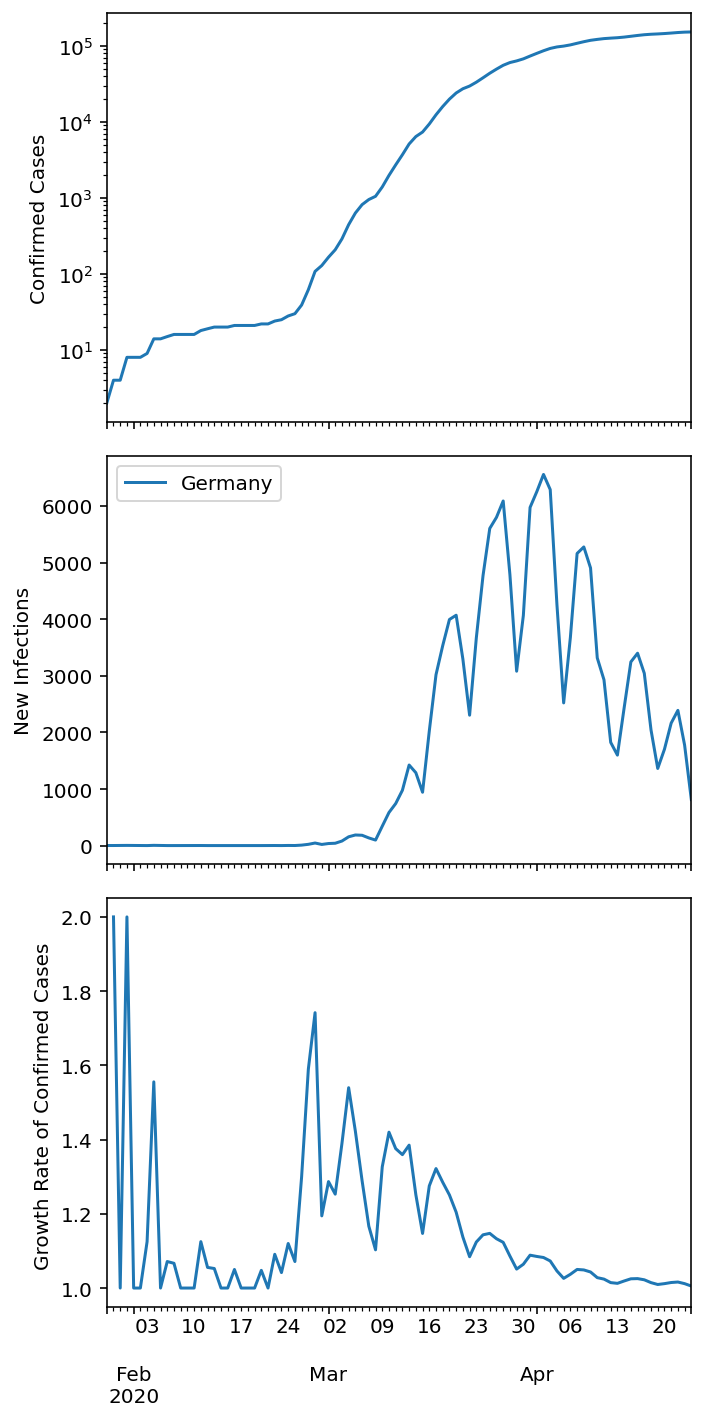

In [8]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=3, figsize=(5, 10), sharex=True, num=1)


germanyc.plot(ax=ax1[0], logy=True)
germany.plot(ax=ax1[1])
(germanyc / germanyc.shift(1)).plot(ax=ax1[2])

ax1[0].set_ylabel('Confirmed Cases')
ax1[1].set_ylabel('New Infections')
ax1[2].set_ylabel('Growth Rate of Confirmed Cases ')

ax1[1].legend(['Germany'])
fig1.tight_layout()

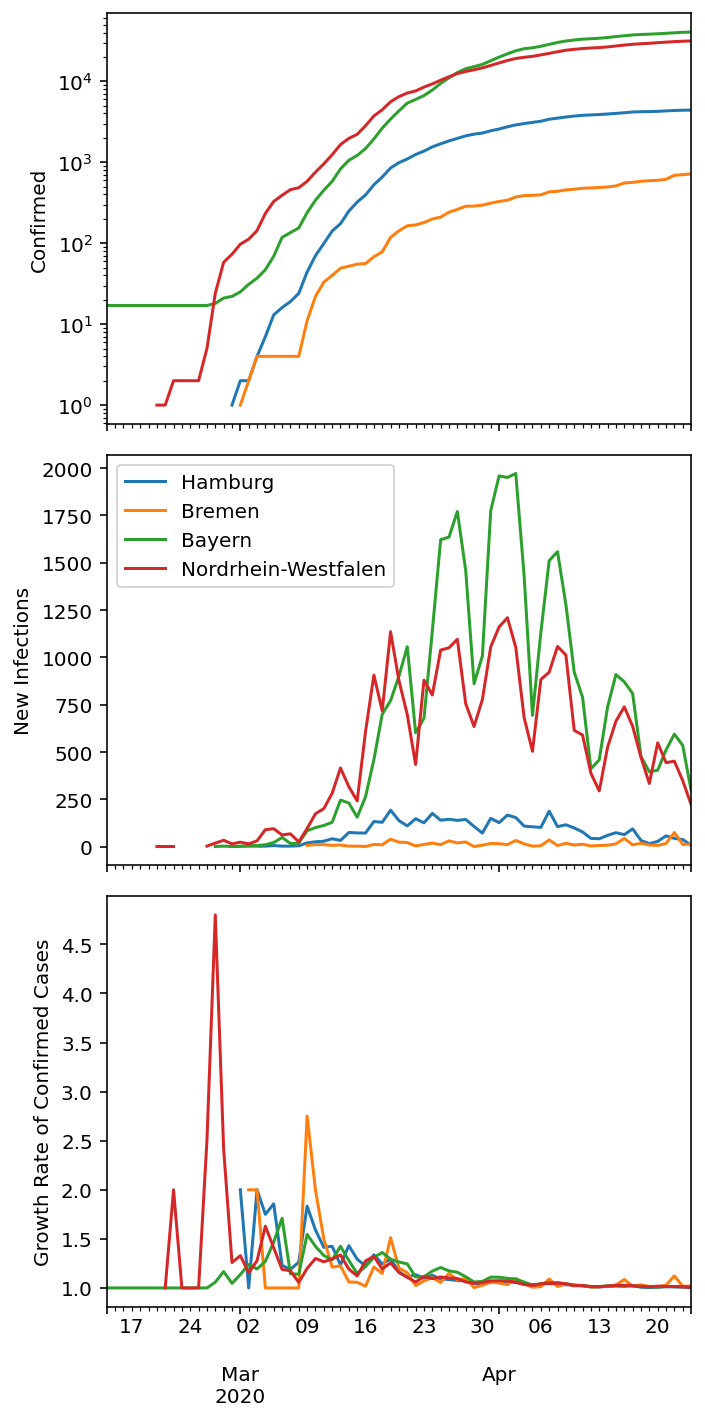

In [9]:
plt.close(2)
fig2, ax2 = plt.subplots(nrows=3, figsize=(5,10), sharex=True, num=2)

# show only last 2 weeks for better visibility
start = cases.index[-1].floor('d') - pd.Timedelta('70d')
end   = cases.index[-1].floor('d')

casesc.loc[start:end, plot_de].plot(ax=ax2[0], logy=True, legend=False)
cases.loc[start:end, plot_de].plot(ax=ax2[1], legend=False)
(casesc / casesc.shift(1)).loc[start:end, plot_de].plot(ax=ax2[2], legend=False)

ax2[0].set_ylabel('Confirmed')
ax2[1].set_ylabel('New Infections')
ax2[2].set_ylabel('Growth Rate of Confirmed Cases')

ax2[1].legend()

fig2.tight_layout()

In [10]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')